In [1]:
pip install qiskit-ignis

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1200\1477282466.py:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1200\1477282466.py:26: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_job = backend.run(assemble(cal_circuits, backend=backend))


hihihihih <qiskit.ignis.mitigation.measurement.fitters.CompleteMeasFitter object at 0x000002BAF9C31220>
Original counts:
{'111': 503, '000': 497}
Mitigated counts:
{'000': 497.00000086129114, '001': 2.2207733365537154e-16, '011': 1.1103866682768577e-16, '100': 1.1103866682768577e-16, '101': 1.1103866682768577e-16, '111': 502.9999991794925}


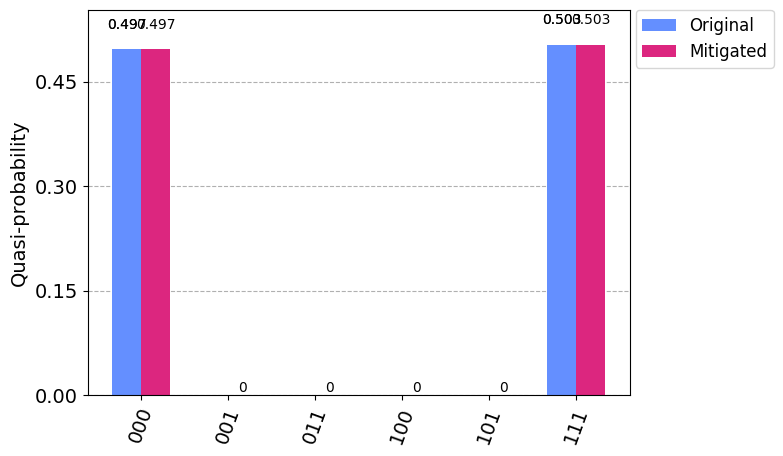

In [4]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal

# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

# Simulate the noisy circuit
qobj = assemble(transpiled_qc, shots=1000)
job = backend.run(qobj)
result = job.result()
counts = result.get_counts()

# Perform error mitigation
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1, 2])
cal_job = backend.run(assemble(cal_circuits, backend=backend))
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_counts = meas_fitter.filter.apply(counts)

# Print the original counts
print("Original counts:")
print(counts)

# Print the mitigated counts
print("Mitigated counts:")
print(mitigated_counts)

# Plot the histograms of the original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])
